In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive/


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/ImageDst/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/ImageDst/Test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/ImageDst/Train/Urban')))
print(len(os.listdir('/content/drive/MyDrive/ImageDst/Train/CountrySide')))
print(len(os.listdir('/content/drive/MyDrive/ImageDst/Test/Urban')))
print(len(os.listdir('/content/drive/MyDrive/ImageDst/Test/CountrySide')))

269
246
48
48


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 413 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
13/13 [==============================] - 144s 11s/step - loss: 0.7811 - accuracy: 0.6780 - val_loss: 0.4487 - val_accuracy: 0.8039
Epoch 2/30
13/13 [==============================] - 94s 7s/step - loss: 0.2856 - accuracy: 0.9056 - val_loss: 0.4809 - val_accuracy: 0.8529
Epoch 3/30
13/13 [==============================] - 95s 7s/step - loss: 0.2360 - accuracy: 0.9080 - val_loss: 0.3775 - val_accuracy: 0.8627
Epoch 4/30
13/13 [==============================] - 94s 7s/step - loss: 0.2094 - accuracy: 0.9298 - val_loss: 0.4023 - val_accuracy: 0.8627
Epoch 5/30
13/13 [==============================] - 95s 7s/step - loss: 0.1557 - accuracy: 0.9298 - val_loss: 0.4284 - val_accuracy: 0.8922
Epoch 6/30
13/13 [==============================] - 95s 7s/step - loss: 0.1316 - accuracy: 0.9467 - val_loss: 0.5320 - val_accuracy: 0.8627
Epoch 7/30
13/13 [==============================] - 97s 7s/step - loss: 0.0921 - accuracy: 0.9734 - val_loss: 0.6033 - val_accuracy: 0.8431
Epoch 8/30
13/13 [

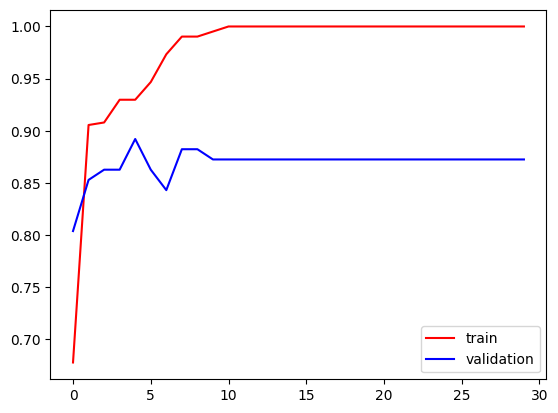

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

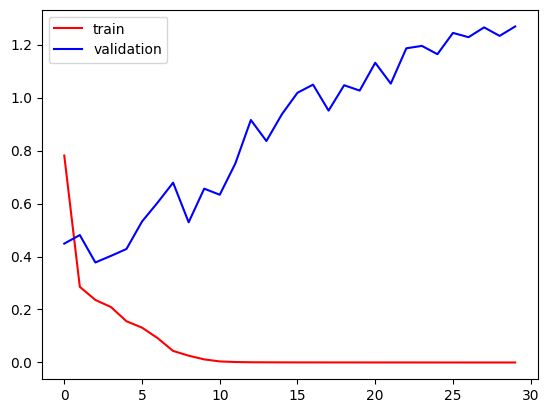

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 96 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

3/3 [==============================] - 33s 14s/step
[[1.7157300e-04]
 [5.1284803e-07]
 [1.0000000e+00]
 [2.1285904e-09]
 [2.0948875e-08]
 [9.9986869e-01]
 [1.1250824e-09]
 [6.3171979e-10]
 [9.9999928e-01]
 [9.9980628e-01]
 [4.0022738e-07]
 [9.9999809e-01]
 [2.2937286e-06]
 [1.0000000e+00]
 [2.1907354e-05]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.4967514e-05]
 [9.9987686e-01]
 [9.9999434e-01]
 [9.9999988e-01]
 [1.6615433e-06]
 [5.6184513e-06]
 [4.4019678e-01]
 [1.0000000e+00]
 [2.7143570e-02]
 [9.9997509e-01]
 [1.0000000e+00]
 [2.0666373e-09]
 [7.7261188e-07]
 [1.0000000e+00]
 [1.9557528e-04]
 [1.0000000e+00]
 [9.9999988e-01]
 [8.6535129e-10]
 [1.0000000e+00]
 [9.9999976e-01]
 [1.0000000e+00]
 [1.9407068e-10]
 [6.0216179e-03]
 [9.9999970e-01]
 [1.0000000e+00]
 [1.7239478e-04]
 [1.0000000e+00]
 [9.9958788e-09]
 [1.5987784e-05]
 [7.1781267e-07]
 [9.9989039e-01]
 [2.1374237e-06]
 [3.5685821e-09]
 [9.9999982e-01]
 [1.0000000e+00]
 [9.9965078e-01]
 [3.3344037e-03]
 [2.7476766e-11]
 [9.9999928e-

In [ ]:
len(predictions)

96

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[24 24]
 [21 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.52        48
           1       0.53      0.56      0.55        48

    accuracy                           0.53        96
   macro avg       0.53      0.53      0.53        96
weighted avg       0.53      0.53      0.53        96



In [3]:



#--CNN Pre-trained Model--




In [4]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive/


In [5]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/ImageDst/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/ImageDst/Test'    # Update with your actual path

In [6]:
import os
print(len(os.listdir('/content/drive/MyDrive/ImageDst/Train/Urban')))
print(len(os.listdir('/content/drive/MyDrive/ImageDst/Train/CountrySide')))
print(len(os.listdir('/content/drive/MyDrive/ImageDst/Test/Urban')))
print(len(os.listdir('/content/drive/MyDrive/ImageDst/Test/CountrySide')))

269
246
48
48


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 413 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [8]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [10]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [11]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
13/13 [==============================] - 221s 16s/step - loss: 2.4716 - accuracy: 0.5811 - val_loss: 1.0056 - val_accuracy: 0.6569
Epoch 2/3
13/13 [==============================] - 178s 13s/step - loss: 0.7631 - accuracy: 0.7046 - val_loss: 0.9380 - val_accuracy: 0.6471
Epoch 3/3
13/13 [==============================] - 158s 12s/step - loss: 0.5928 - accuracy: 0.7337 - val_loss: 0.3691 - val_accuracy: 0.8431


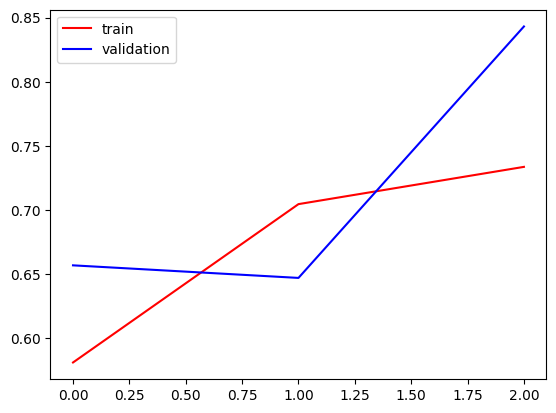

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

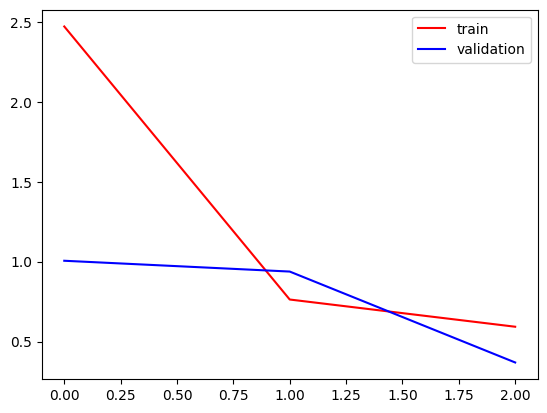

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 96 images belonging to 2 classes.


In [15]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

3/3 [==============================] - 48s 17s/step
[[0.3948989 ]
 [0.17891017]
 [0.12070909]
 [0.30073848]
 [0.02795019]
 [0.02144829]
 [0.98347133]
 [0.989666  ]
 [0.66454935]
 [0.7649518 ]
 [0.0693846 ]
 [0.81191164]
 [0.1401522 ]
 [0.01353617]
 [0.96779454]
 [0.6993785 ]
 [0.10505373]
 [0.9774225 ]
 [0.23061517]
 [0.01583122]
 [0.0637435 ]
 [0.46906534]
 [0.93109596]
 [0.51632506]
 [0.9090653 ]
 [0.6534447 ]
 [0.01111009]
 [0.07098243]
 [0.13869198]
 [0.99999815]
 [0.02127297]
 [0.62291217]
 [0.18293355]
 [0.43572223]
 [0.02016508]
 [0.5588603 ]
 [0.03221643]
 [0.9355965 ]
 [0.09131626]
 [0.7672954 ]
 [0.960428  ]
 [0.08619038]
 [0.31437156]
 [0.05605758]
 [0.02176681]
 [0.081747  ]
 [0.36395365]
 [0.55683553]
 [0.9558619 ]
 [0.6004473 ]
 [0.07205803]
 [0.10273062]
 [0.99781805]
 [0.0991096 ]
 [0.25370052]
 [0.05730602]
 [0.79217577]
 [0.19267948]
 [0.39475438]
 [0.10607123]
 [0.9903813 ]
 [0.9934986 ]
 [0.34258842]
 [0.14980745]
 [0.02742055]
 [0.03523437]
 [0.08252485]
 [0.994153

In [16]:
len(predictions)

96

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[29 19]
 [28 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        48
           1       0.51      0.42      0.46        48

    accuracy                           0.51        96
   macro avg       0.51      0.51      0.51        96
weighted avg       0.51      0.51      0.51        96

